# Using GANs to generate MNIST digits with PyTorch
#### https://arxiv.org/pdf/1406.2661.pdf

In [1]:
import time
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, RandomSampler
from torchvision.utils import make_grid
import torchvision
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Choose device
cuda = True if torch.cuda.is_available() else False
device = torch.device('cuda') if cuda else torch.device('cpu')
print(f'Using: {device}')

Using: cuda


In [3]:
# Set latent space dimension and numbe of images for one mini batch
Z_DIM = 100
BATCH_SIZE = 256
EPOCHS = 200
SHOW_EVERY = 5

# Load dataset and create dataloader

In [4]:
mnist_dataset = datasets.MNIST(
                    root='data', 
                    train=True, 
                    transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5], [0.5])]),
                    download=True
                )

mnist_dataloader = DataLoader(
                        dataset=mnist_dataset, 
                        batch_size=BATCH_SIZE, 
                        shuffle=True, 
                        num_workers=8
                   )

IMG_DIM = mnist_dataset[0][0].shape[1]

# Show a few samples

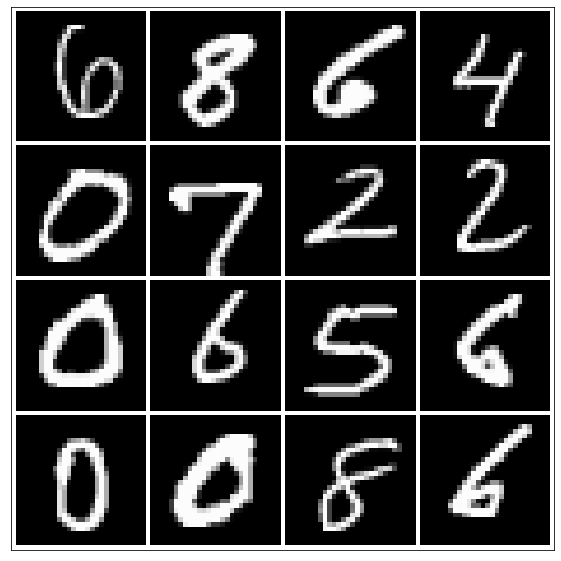

In [5]:
imgs_batch = next(iter(mnist_dataloader))[0][:16]
imgs_show = make_grid(imgs_batch, nrow=4, pad_value=1, padding=1, normalize=True)
imgs_show = imgs_show.permute(1, 2, 0)

plt.figure(figsize=(10, 10))
plt.imshow(imgs_show, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Create generator and discriminator networks

In [6]:
class Generator(nn.Module):
    def __init__(self, z_dim=Z_DIM, img_dim=IMG_DIM):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
                        nn.Linear(in_features=z_dim, out_features=128),
                        nn.LeakyReLU(0.2, inplace=True),
            
                        nn.Linear(in_features=128, out_features=256),
                        nn.LeakyReLU(0.2, inplace=True),
                        
                        nn.Linear(in_features=256, out_features=512),
                        nn.LeakyReLU(0.2, inplace=True),
            
                        nn.Linear(in_features=512, out_features=img_dim * img_dim),
                        nn.Tanh(),
                    )
        
    def forward(self, x):
        x = self.net(x)
        x = x.reshape(-1, 1, IMG_DIM, IMG_DIM)
        return x

generator = Generator()

In [7]:
class Discriminator(nn.Module):
    def __init__(self, img_dim=IMG_DIM):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
                     nn.Linear(in_features=img_dim * img_dim, out_features=512),
                     nn.LeakyReLU(0.2, inplace=True),
            
                     nn.Linear(in_features=512, out_features=256),
                     nn.LeakyReLU(0.2, inplace=True), 
        
                     nn.Linear(in_features=256, out_features=1),
                     nn.Sigmoid()
                   )
        
    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.net(x)
        return x

discriminator = Discriminator()

# Show a few samples from generator

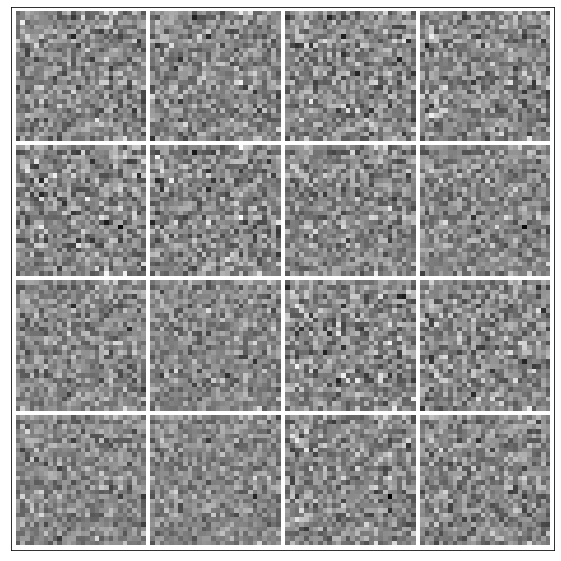

In [8]:
generated_images = generator(torch.randn(BATCH_SIZE, Z_DIM)) #torch.Tensor(np.random.rand(BATCH_SIZE, Z_DIM)))

imgs_show = make_grid(generated_images[:16], nrow=4, pad_value=1, padding=1, normalize=True).detach()
imgs_show = imgs_show.permute(1, 2, 0)

plt.figure(figsize=(10, 10))
plt.imshow(imgs_show, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Loss function

In [9]:
criterion = nn.BCELoss()

# Move networks and criterion to device

In [10]:
generator.to(device)
discriminator.to(device)
criterion.to(device)

BCELoss()

# Initialize optimizers for generator and discriminator

In [11]:
optim_generator = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_discriminator = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training

Epoch: 0 / 200 | Discriminator loss: 0.5602 | Generator loss: 0.9554.


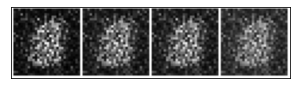

Epoch: 1 / 200 | Discriminator loss: 0.8713 | Generator loss: 3.4001.
Epoch: 2 / 200 | Discriminator loss: 0.2330 | Generator loss: 2.4801.
Epoch: 3 / 200 | Discriminator loss: 0.2173 | Generator loss: 3.4043.
Epoch: 4 / 200 | Discriminator loss: 0.2589 | Generator loss: 3.0232.
Epoch: 5 / 200 | Discriminator loss: 0.4569 | Generator loss: 1.0420.


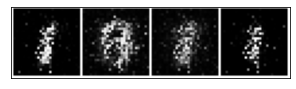

Epoch: 6 / 200 | Discriminator loss: 0.9572 | Generator loss: 4.2962.
Epoch: 7 / 200 | Discriminator loss: 0.3433 | Generator loss: 3.2714.
Epoch: 8 / 200 | Discriminator loss: 0.2648 | Generator loss: 2.6366.
Epoch: 9 / 200 | Discriminator loss: 0.1853 | Generator loss: 2.7292.
Epoch: 10 / 200 | Discriminator loss: 0.2412 | Generator loss: 2.3176.


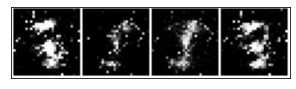

Epoch: 11 / 200 | Discriminator loss: 0.3369 | Generator loss: 3.0757.
Epoch: 12 / 200 | Discriminator loss: 0.1606 | Generator loss: 2.6562.
Epoch: 13 / 200 | Discriminator loss: 0.1423 | Generator loss: 3.0403.
Epoch: 14 / 200 | Discriminator loss: 0.2354 | Generator loss: 2.4648.
Epoch: 15 / 200 | Discriminator loss: 0.3171 | Generator loss: 4.5921.


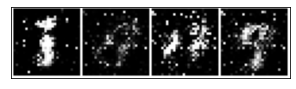

Epoch: 16 / 200 | Discriminator loss: 0.1876 | Generator loss: 2.5557.
Epoch: 17 / 200 | Discriminator loss: 0.2161 | Generator loss: 2.4048.
Epoch: 18 / 200 | Discriminator loss: 0.2397 | Generator loss: 2.6381.
Epoch: 19 / 200 | Discriminator loss: 0.2587 | Generator loss: 2.8668.
Epoch: 20 / 200 | Discriminator loss: 0.2616 | Generator loss: 2.1707.


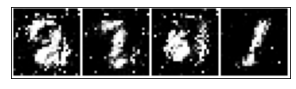

Epoch: 21 / 200 | Discriminator loss: 0.3954 | Generator loss: 4.0784.
Epoch: 22 / 200 | Discriminator loss: 0.3122 | Generator loss: 2.0184.
Epoch: 23 / 200 | Discriminator loss: 0.2390 | Generator loss: 2.0045.
Epoch: 24 / 200 | Discriminator loss: 0.3920 | Generator loss: 2.3887.
Epoch: 25 / 200 | Discriminator loss: 0.4795 | Generator loss: 3.2115.


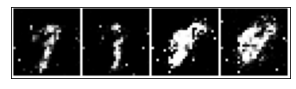

Epoch: 26 / 200 | Discriminator loss: 0.4829 | Generator loss: 3.7987.
Epoch: 27 / 200 | Discriminator loss: 0.4162 | Generator loss: 0.9813.
Epoch: 28 / 200 | Discriminator loss: 0.3906 | Generator loss: 1.1629.
Epoch: 29 / 200 | Discriminator loss: 0.4162 | Generator loss: 1.7806.
Epoch: 30 / 200 | Discriminator loss: 0.5032 | Generator loss: 2.0428.


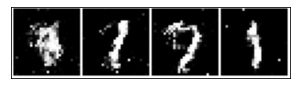

Epoch: 31 / 200 | Discriminator loss: 0.5007 | Generator loss: 2.2857.
Epoch: 32 / 200 | Discriminator loss: 0.5357 | Generator loss: 1.6324.
Epoch: 33 / 200 | Discriminator loss: 0.4431 | Generator loss: 1.8046.
Epoch: 34 / 200 | Discriminator loss: 0.4757 | Generator loss: 0.7987.
Epoch: 35 / 200 | Discriminator loss: 0.3999 | Generator loss: 1.3098.


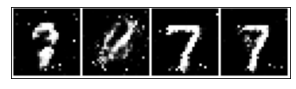

Epoch: 36 / 200 | Discriminator loss: 0.3927 | Generator loss: 1.1610.
Epoch: 37 / 200 | Discriminator loss: 0.6953 | Generator loss: 0.8628.
Epoch: 38 / 200 | Discriminator loss: 0.4653 | Generator loss: 0.9047.
Epoch: 39 / 200 | Discriminator loss: 0.5006 | Generator loss: 1.6896.
Epoch: 40 / 200 | Discriminator loss: 0.4876 | Generator loss: 1.1085.


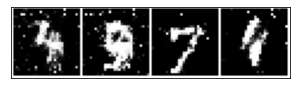

Epoch: 41 / 200 | Discriminator loss: 0.4673 | Generator loss: 1.1962.
Epoch: 42 / 200 | Discriminator loss: 0.4977 | Generator loss: 1.3423.
Epoch: 43 / 200 | Discriminator loss: 0.5797 | Generator loss: 0.6311.
Epoch: 44 / 200 | Discriminator loss: 0.4515 | Generator loss: 1.0080.
Epoch: 45 / 200 | Discriminator loss: 0.4929 | Generator loss: 0.9764.


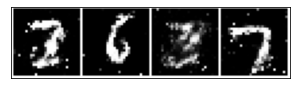

Epoch: 46 / 200 | Discriminator loss: 0.5439 | Generator loss: 2.2043.
Epoch: 47 / 200 | Discriminator loss: 0.5422 | Generator loss: 2.0651.
Epoch: 48 / 200 | Discriminator loss: 0.5028 | Generator loss: 1.9841.
Epoch: 49 / 200 | Discriminator loss: 0.5135 | Generator loss: 0.8550.
Epoch: 50 / 200 | Discriminator loss: 0.5154 | Generator loss: 0.8299.


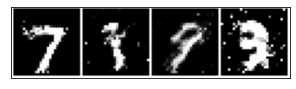

Epoch: 51 / 200 | Discriminator loss: 0.4922 | Generator loss: 0.9791.
Epoch: 52 / 200 | Discriminator loss: 0.5337 | Generator loss: 1.3120.
Epoch: 53 / 200 | Discriminator loss: 0.5132 | Generator loss: 2.0688.
Epoch: 54 / 200 | Discriminator loss: 0.4994 | Generator loss: 1.5284.
Epoch: 55 / 200 | Discriminator loss: 0.5424 | Generator loss: 0.7171.


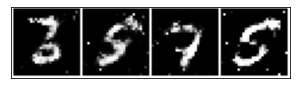

Epoch: 56 / 200 | Discriminator loss: 0.4950 | Generator loss: 1.1108.
Epoch: 57 / 200 | Discriminator loss: 0.4920 | Generator loss: 1.2287.
Epoch: 58 / 200 | Discriminator loss: 0.5507 | Generator loss: 0.8844.
Epoch: 59 / 200 | Discriminator loss: 0.4775 | Generator loss: 1.0279.
Epoch: 60 / 200 | Discriminator loss: 0.4844 | Generator loss: 0.9057.


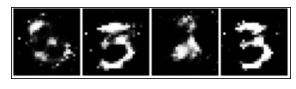

Epoch: 61 / 200 | Discriminator loss: 0.6632 | Generator loss: 0.3892.
Epoch: 62 / 200 | Discriminator loss: 0.5732 | Generator loss: 0.7171.
Epoch: 63 / 200 | Discriminator loss: 0.6015 | Generator loss: 0.5025.
Epoch: 64 / 200 | Discriminator loss: 0.5465 | Generator loss: 0.9816.
Epoch: 65 / 200 | Discriminator loss: 0.5174 | Generator loss: 1.0017.


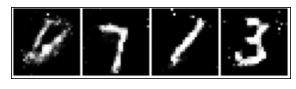

Epoch: 66 / 200 | Discriminator loss: 0.5645 | Generator loss: 0.5929.
Epoch: 67 / 200 | Discriminator loss: 0.5950 | Generator loss: 0.5335.
Epoch: 68 / 200 | Discriminator loss: 0.5358 | Generator loss: 1.3726.
Epoch: 69 / 200 | Discriminator loss: 0.5119 | Generator loss: 1.4011.
Epoch: 70 / 200 | Discriminator loss: 0.4809 | Generator loss: 1.0901.


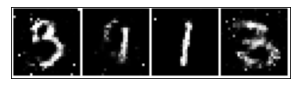

Epoch: 71 / 200 | Discriminator loss: 0.5332 | Generator loss: 1.8167.
Epoch: 72 / 200 | Discriminator loss: 0.4986 | Generator loss: 0.8486.
Epoch: 73 / 200 | Discriminator loss: 0.6416 | Generator loss: 0.5011.
Epoch: 74 / 200 | Discriminator loss: 0.5219 | Generator loss: 1.1729.
Epoch: 75 / 200 | Discriminator loss: 0.5041 | Generator loss: 0.7629.


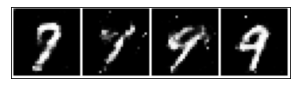

Epoch: 76 / 200 | Discriminator loss: 0.5412 | Generator loss: 1.1893.
Epoch: 77 / 200 | Discriminator loss: 0.4628 | Generator loss: 1.4451.
Epoch: 78 / 200 | Discriminator loss: 0.5927 | Generator loss: 0.7736.
Epoch: 79 / 200 | Discriminator loss: 0.5195 | Generator loss: 0.9960.
Epoch: 80 / 200 | Discriminator loss: 0.6579 | Generator loss: 0.4242.


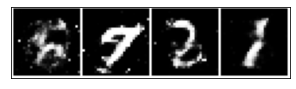

Epoch: 81 / 200 | Discriminator loss: 0.4678 | Generator loss: 1.3562.
Epoch: 82 / 200 | Discriminator loss: 0.4528 | Generator loss: 1.5815.
Epoch: 83 / 200 | Discriminator loss: 0.4969 | Generator loss: 0.8529.
Epoch: 84 / 200 | Discriminator loss: 0.4659 | Generator loss: 1.0481.
Epoch: 85 / 200 | Discriminator loss: 0.6745 | Generator loss: 2.2004.


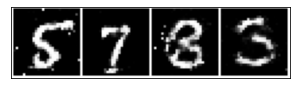

Epoch: 86 / 200 | Discriminator loss: 0.4799 | Generator loss: 1.1696.
Epoch: 87 / 200 | Discriminator loss: 0.5703 | Generator loss: 0.7729.
Epoch: 88 / 200 | Discriminator loss: 0.5197 | Generator loss: 1.1355.
Epoch: 89 / 200 | Discriminator loss: 0.5581 | Generator loss: 1.7348.
Epoch: 90 / 200 | Discriminator loss: 0.5788 | Generator loss: 0.8750.


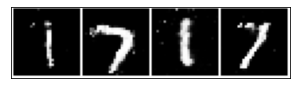

Epoch: 91 / 200 | Discriminator loss: 0.4910 | Generator loss: 1.5687.
Epoch: 92 / 200 | Discriminator loss: 0.5064 | Generator loss: 0.7547.
Epoch: 93 / 200 | Discriminator loss: 0.5625 | Generator loss: 1.4640.
Epoch: 94 / 200 | Discriminator loss: 0.4953 | Generator loss: 0.7362.
Epoch: 95 / 200 | Discriminator loss: 0.5951 | Generator loss: 0.4099.


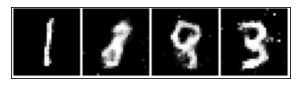

Epoch: 96 / 200 | Discriminator loss: 0.4237 | Generator loss: 1.2461.
Epoch: 97 / 200 | Discriminator loss: 0.4866 | Generator loss: 1.0062.
Epoch: 98 / 200 | Discriminator loss: 0.5858 | Generator loss: 1.7375.
Epoch: 99 / 200 | Discriminator loss: 0.5827 | Generator loss: 2.0403.
Epoch: 100 / 200 | Discriminator loss: 0.4891 | Generator loss: 1.0949.


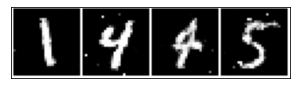

Epoch: 101 / 200 | Discriminator loss: 0.4603 | Generator loss: 1.0196.
Epoch: 102 / 200 | Discriminator loss: 0.4698 | Generator loss: 0.9673.
Epoch: 103 / 200 | Discriminator loss: 0.4965 | Generator loss: 2.1183.
Epoch: 104 / 200 | Discriminator loss: 0.4716 | Generator loss: 1.0452.
Epoch: 105 / 200 | Discriminator loss: 0.4527 | Generator loss: 1.8834.


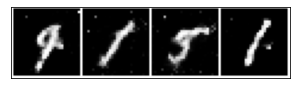

Epoch: 106 / 200 | Discriminator loss: 0.5055 | Generator loss: 1.2915.
Epoch: 107 / 200 | Discriminator loss: 0.4602 | Generator loss: 1.3167.
Epoch: 108 / 200 | Discriminator loss: 0.5122 | Generator loss: 1.8739.
Epoch: 109 / 200 | Discriminator loss: 0.5127 | Generator loss: 0.7553.
Epoch: 110 / 200 | Discriminator loss: 0.4782 | Generator loss: 1.2308.


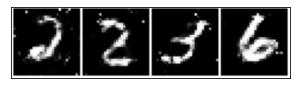

Epoch: 111 / 200 | Discriminator loss: 0.4934 | Generator loss: 1.0855.
Epoch: 112 / 200 | Discriminator loss: 0.4283 | Generator loss: 1.3120.
Epoch: 113 / 200 | Discriminator loss: 0.4103 | Generator loss: 1.3555.
Epoch: 114 / 200 | Discriminator loss: 0.4354 | Generator loss: 1.7516.
Epoch: 115 / 200 | Discriminator loss: 0.4883 | Generator loss: 1.0192.


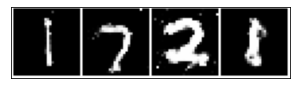

Epoch: 116 / 200 | Discriminator loss: 0.4782 | Generator loss: 1.0719.
Epoch: 117 / 200 | Discriminator loss: 0.4966 | Generator loss: 0.9827.
Epoch: 118 / 200 | Discriminator loss: 0.4306 | Generator loss: 1.5207.
Epoch: 119 / 200 | Discriminator loss: 0.5303 | Generator loss: 0.8220.
Epoch: 120 / 200 | Discriminator loss: 0.5078 | Generator loss: 0.9473.


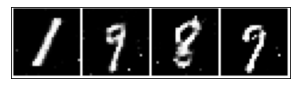

Epoch: 121 / 200 | Discriminator loss: 0.4653 | Generator loss: 1.0903.
Epoch: 122 / 200 | Discriminator loss: 0.4804 | Generator loss: 0.9440.
Epoch: 123 / 200 | Discriminator loss: 0.4159 | Generator loss: 1.4791.
Epoch: 124 / 200 | Discriminator loss: 0.5395 | Generator loss: 0.8850.
Epoch: 125 / 200 | Discriminator loss: 0.4208 | Generator loss: 1.7622.


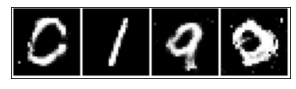

Epoch: 126 / 200 | Discriminator loss: 0.4103 | Generator loss: 1.4082.
Epoch: 127 / 200 | Discriminator loss: 0.4361 | Generator loss: 0.9684.
Epoch: 128 / 200 | Discriminator loss: 0.4795 | Generator loss: 1.3208.
Epoch: 129 / 200 | Discriminator loss: 0.5056 | Generator loss: 1.7813.
Epoch: 130 / 200 | Discriminator loss: 0.4507 | Generator loss: 1.3335.


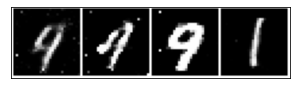

Epoch: 131 / 200 | Discriminator loss: 0.4944 | Generator loss: 2.3432.
Epoch: 132 / 200 | Discriminator loss: 0.4048 | Generator loss: 1.4055.
Epoch: 133 / 200 | Discriminator loss: 0.7065 | Generator loss: 2.4250.
Epoch: 134 / 200 | Discriminator loss: 0.5258 | Generator loss: 2.4120.
Epoch: 135 / 200 | Discriminator loss: 0.4485 | Generator loss: 1.6235.


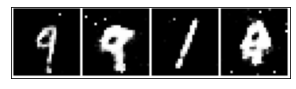

Epoch: 136 / 200 | Discriminator loss: 0.4096 | Generator loss: 1.3171.
Epoch: 137 / 200 | Discriminator loss: 0.4242 | Generator loss: 1.0087.
Epoch: 138 / 200 | Discriminator loss: 0.4835 | Generator loss: 1.7353.
Epoch: 139 / 200 | Discriminator loss: 0.3949 | Generator loss: 1.6777.
Epoch: 140 / 200 | Discriminator loss: 0.4036 | Generator loss: 1.2195.


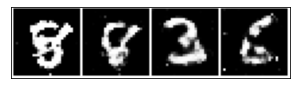

Epoch: 141 / 200 | Discriminator loss: 0.4563 | Generator loss: 1.2641.
Epoch: 142 / 200 | Discriminator loss: 0.4585 | Generator loss: 1.5913.
Epoch: 143 / 200 | Discriminator loss: 0.4184 | Generator loss: 1.9251.
Epoch: 144 / 200 | Discriminator loss: 0.4413 | Generator loss: 2.0009.
Epoch: 145 / 200 | Discriminator loss: 0.4857 | Generator loss: 0.8133.


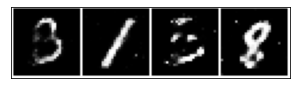

Epoch: 146 / 200 | Discriminator loss: 0.4607 | Generator loss: 1.0971.
Epoch: 147 / 200 | Discriminator loss: 0.4417 | Generator loss: 1.6884.
Epoch: 148 / 200 | Discriminator loss: 0.3801 | Generator loss: 1.9498.
Epoch: 149 / 200 | Discriminator loss: 0.4389 | Generator loss: 1.9961.
Epoch: 150 / 200 | Discriminator loss: 0.3908 | Generator loss: 1.3297.


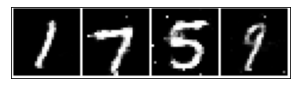

Epoch: 151 / 200 | Discriminator loss: 0.4039 | Generator loss: 1.4822.
Epoch: 152 / 200 | Discriminator loss: 0.4292 | Generator loss: 1.6634.
Epoch: 153 / 200 | Discriminator loss: 0.4335 | Generator loss: 2.0939.
Epoch: 154 / 200 | Discriminator loss: 0.4181 | Generator loss: 1.4784.
Epoch: 155 / 200 | Discriminator loss: 0.3635 | Generator loss: 1.4864.


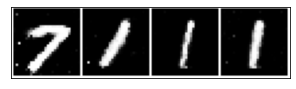

Epoch: 156 / 200 | Discriminator loss: 0.4249 | Generator loss: 2.0757.
Epoch: 157 / 200 | Discriminator loss: 0.4367 | Generator loss: 1.2571.
Epoch: 158 / 200 | Discriminator loss: 0.4124 | Generator loss: 1.6974.
Epoch: 159 / 200 | Discriminator loss: 0.4146 | Generator loss: 1.3763.
Epoch: 160 / 200 | Discriminator loss: 0.3765 | Generator loss: 1.5753.


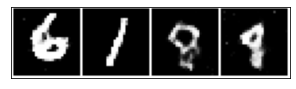

Epoch: 161 / 200 | Discriminator loss: 0.5739 | Generator loss: 2.1331.
Epoch: 162 / 200 | Discriminator loss: 0.4135 | Generator loss: 1.0374.
Epoch: 163 / 200 | Discriminator loss: 0.4182 | Generator loss: 1.5804.
Epoch: 164 / 200 | Discriminator loss: 0.4135 | Generator loss: 1.1167.
Epoch: 165 / 200 | Discriminator loss: 0.3264 | Generator loss: 1.1948.


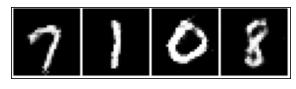

Epoch: 166 / 200 | Discriminator loss: 0.4924 | Generator loss: 0.7722.
Epoch: 167 / 200 | Discriminator loss: 0.4131 | Generator loss: 1.1553.
Epoch: 168 / 200 | Discriminator loss: 0.5656 | Generator loss: 0.6636.
Epoch: 169 / 200 | Discriminator loss: 0.5828 | Generator loss: 2.0216.
Epoch: 170 / 200 | Discriminator loss: 0.4126 | Generator loss: 2.1592.


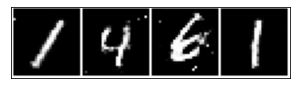

Epoch: 171 / 200 | Discriminator loss: 0.3646 | Generator loss: 1.4144.
Epoch: 172 / 200 | Discriminator loss: 0.4248 | Generator loss: 1.8713.
Epoch: 173 / 200 | Discriminator loss: 0.3869 | Generator loss: 1.7054.
Epoch: 174 / 200 | Discriminator loss: 0.3588 | Generator loss: 1.7571.
Epoch: 175 / 200 | Discriminator loss: 0.3981 | Generator loss: 1.5737.


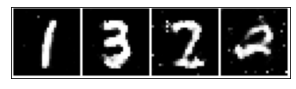

Epoch: 176 / 200 | Discriminator loss: 0.3542 | Generator loss: 1.4823.
Epoch: 177 / 200 | Discriminator loss: 0.4296 | Generator loss: 1.5320.
Epoch: 178 / 200 | Discriminator loss: 0.3847 | Generator loss: 1.2816.
Epoch: 179 / 200 | Discriminator loss: 0.4726 | Generator loss: 2.0638.
Epoch: 180 / 200 | Discriminator loss: 0.4275 | Generator loss: 2.2550.


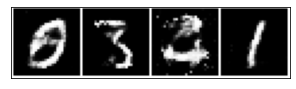

Epoch: 181 / 200 | Discriminator loss: 0.4448 | Generator loss: 1.2986.
Epoch: 182 / 200 | Discriminator loss: 0.3710 | Generator loss: 1.3250.
Epoch: 183 / 200 | Discriminator loss: 0.4822 | Generator loss: 0.8143.
Epoch: 184 / 200 | Discriminator loss: 0.3661 | Generator loss: 1.2673.
Epoch: 185 / 200 | Discriminator loss: 0.5488 | Generator loss: 0.9534.


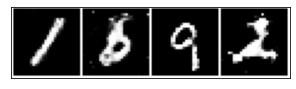

Epoch: 186 / 200 | Discriminator loss: 0.3833 | Generator loss: 1.1251.
Epoch: 187 / 200 | Discriminator loss: 0.4015 | Generator loss: 1.7618.
Epoch: 188 / 200 | Discriminator loss: 0.3958 | Generator loss: 2.2305.
Epoch: 189 / 200 | Discriminator loss: 0.3870 | Generator loss: 1.5117.
Epoch: 190 / 200 | Discriminator loss: 0.3609 | Generator loss: 1.2928.


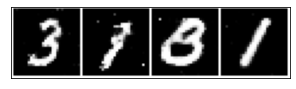

Epoch: 191 / 200 | Discriminator loss: 0.3921 | Generator loss: 1.6264.
Epoch: 192 / 200 | Discriminator loss: 0.5004 | Generator loss: 0.9369.
Epoch: 193 / 200 | Discriminator loss: 0.4348 | Generator loss: 2.3034.
Epoch: 194 / 200 | Discriminator loss: 0.3999 | Generator loss: 2.0900.
Epoch: 195 / 200 | Discriminator loss: 0.3626 | Generator loss: 1.5007.


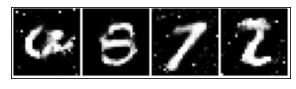

Epoch: 196 / 200 | Discriminator loss: 0.3468 | Generator loss: 1.3967.
Epoch: 197 / 200 | Discriminator loss: 0.3675 | Generator loss: 2.4171.
Epoch: 198 / 200 | Discriminator loss: 0.4487 | Generator loss: 1.6355.
Epoch: 199 / 200 | Discriminator loss: 0.4320 | Generator loss: 1.9952.


In [12]:
generator.train()
discriminator.train()

losses_discriminator = []
losses_generator = []

for epoch in range(EPOCHS):
    for nr_batch, (real_images, _) in enumerate(mnist_dataloader):
        
        # Create labels ground truth
        nr_samples = real_images.shape[0]
        real = torch.ones(nr_samples, 1).to(device)
        fake = torch.zeros(nr_samples, 1).to(device)
        real_images = real_images.to(device)
        
        # ---------------------
        #  TRAIN DISCRIMINATOR
        # ---------------------
        
        optim_discriminator.zero_grad()

        # Sample minibatch of BATCH_SIZE noise samples
        z = torch.randn(nr_samples, Z_DIM).to(device)
        fake_images = generator(z)
        
        # Discriminator should output 1 for real images
        loss_real = criterion(discriminator(real_images), real)

        # Discriminator should output 0 for fake images 
        loss_fake = criterion(discriminator(fake_images.detach()), fake)

        # Accumulate gradients
        loss_discriminator = (loss_real + loss_fake) / 2
        loss_discriminator.backward()
                                             
        # Weights updating
        optim_discriminator.step()
        
        # -----------------
        #  TRAIN GENERATOR
        # -----------------
      
        optim_generator.zero_grad()
        
        # Sample minibatch of BATCH_SIZE noise samples
        z = torch.randn(nr_samples, Z_DIM).to(device)
        fake_images = generator(z)
        
        # From generator perspective, discriminator should return 1 for fake images
        loss_generator = criterion(discriminator(fake_images), real)
        loss_generator.backward()

        # Weights updating
        optim_generator.step()

    # ------------
    #  Log losses
    # ------------
    losses_discriminator.append(loss_discriminator.item())
    losses_generator.append(loss_generator.item())
    
    print(f'Epoch: {epoch} / {EPOCHS} | Discriminator loss: {loss_discriminator:.4f} | Generator loss: {loss_generator:.4f}.')
    
    if epoch % SHOW_EVERY == 0:
        generated_images = generator(torch.randn(BATCH_SIZE, Z_DIM).to(device))
        imgs_show = make_grid(generated_images[:16], nrow=4, pad_value=1, padding=1, normalize=True).detach().cpu()
        imgs_show = imgs_show.permute(1, 2, 0)

        plt.figure(figsize=(5, 5))
        plt.imshow(imgs_show[:30, ...], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.show()

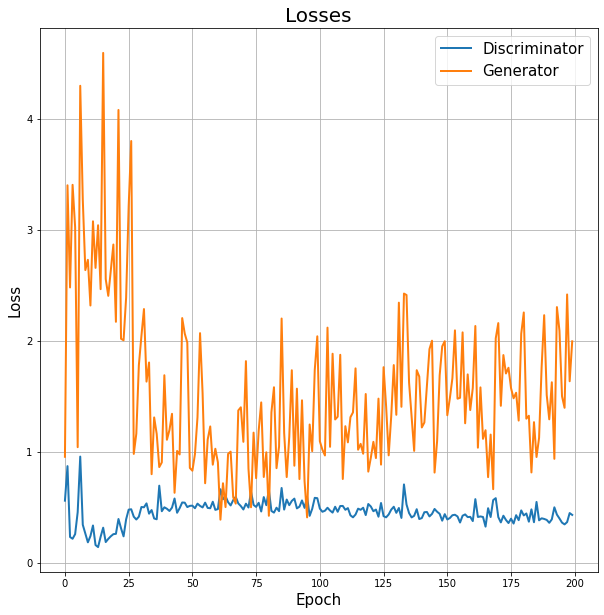

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(losses_discriminator, linewidth=2, label='Discriminator')
plt.plot(losses_generator, linewidth=2, label='Generator')
plt.title('Losses', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig(f'crap{int(time.time())}.png')
plt.show()

# Show generated images

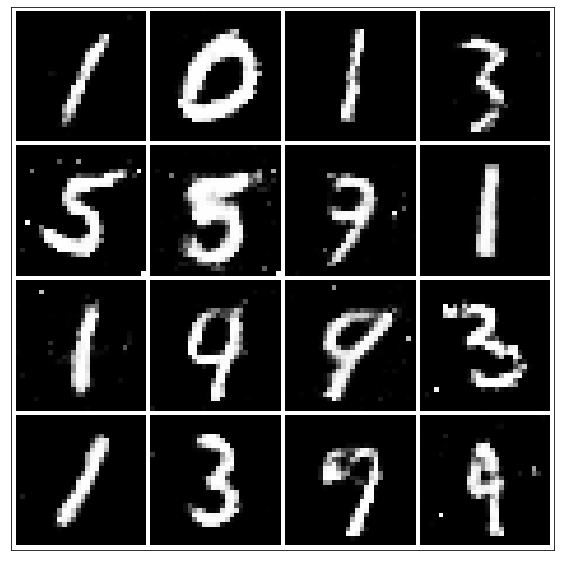

In [19]:
generated_images = generator(torch.randn(BATCH_SIZE, Z_DIM).to(device))

imgs_show = make_grid(generated_images[:16], nrow=4, pad_value=1, padding=1, normalize=True).detach().cpu()
imgs_show = imgs_show.permute(1, 2, 0)

plt.figure(figsize=(10, 10))
plt.imshow(imgs_show, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()